In [304]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'  # 폰트 이름을 적절하게 변경하세요



# 제조업체명 : 삼선전자
## 제품명 : 휴대용 스마트 TV _ 기획상품
## 모델명 : SSAN-TV-4

### 분석데이터 불러오기
 - AS_Management_Data_A.csv 데이터는 A/S 접수 항목관련 데이터이다.

  

### 컬럼명 설명
#### AS_Management_Data_A.csv
 - 접 수 번 호 : 고객 고객불만처리접수 할때 관리를 하기위한 고유번호
 - 접 수 일 자 : 최초 A/S센터에 접수하는 날자
 - 제 조 일 자 : 제품 제조 일자
 - 불량유형_대 : 불량유형 넓은 범위 분류 카테고리
 - 불량유형_중 : 불량유형 중간 범위 분류 카테고리
 - 불량유형_소 : 불량유형 세부 범위 분류 카테고리
 - 불 량 원 인 : 세부 범위 분류에 따른 불량의 원인
 - 보 증 유 무 : 품질보증기간 1년 ( 접수일자 - 제조일자 <= 365일 "무상 A/S" , 접수일자 - 제조일자 > 365일 "유상 A/S )
 - 처 리 내 역 : 품질보증기간에 따른 처리내역 ( "부품교체" . "제품교환" )
 - 수 리 부 품 : 불량원인에 따른 교체되는 부품
 - 부 품 비 용 : 수리비 청구와 관계없이 교체되는 수리부품에 대한 가격
 - 수리비 청구 : 품질보증기간이 지난 고객에게 청구할 A/S 비용 ( 데이터에는 부품의 가격만 명시되어 있음 )

In [305]:
df_a = pd.read_csv('AS_Management_Data_A.csv')


In [306]:
df_a

,접수번호,접수일자,제조일자,불량유형_대,불량유형_중,불량유형_소,불량원인,보증유무,처리_내역,수리_부품,부품_비용,수리비_청구
0,SL21560,2021-05-01,2021-04-16,기능,화면,동작안함,스위치고장,무상,부품교체,스위치 PCB Board Ass'y,25000,미청구
1,SL21561,2021-05-01,2020-03-06,기능,화면,켜지지 않음,Pcb Board 고장,유상,부품교체,MAIN Pcb Board,50000,50000
2,SL21562,2021-05-01,2021-04-13,외관,파손,케이스,검수미비,무상,제품교환,케이스,20000,미청구
3,SL21563,2021-05-01,2020-05-20,외관,흠집,액정,사용자 과실,유상,부품교체,액정 Ass'y,80000,80000
4,SL21564,2021-05-01,2021-04-28,외관,흠집,케이스,검수미비,무상,제품교환,케이스,20000,미청구
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,SL31555,2023-05-31,2022-02-13,외관,파손,액정,사용자 과실,유상,부품교체,액정 Ass'y,80000,80000
9996,SL31556,2023-05-31,2023-05-11,외관,흠집,액정,검수미비,무상,제품교환,액정 Ass'y,80000,미청구
9997,SL31557,2023-05-31,2022-12-29,기능,화면,동작안함,Pcb Board 고장,무상,부품교체,MAIN Pcb Board,50000,미청구
9998,SL31558,2023-05-31,2023-04-18,기능,화면,켜지지 않음,Pcb Board 고장,무상,부품교체,MAIN Pcb Board,50000,미청구


### 분석데이터 불러오기
 - AS_Management_Data_B.csv 데이터는 주 불량 부품공급업체와 최종 검사자에 대한 데이터이다.

### 컬럼명 설명
#### AS_Management_Data_B.csv
 - 접 수 번 호 : 고객 고객불만처리접수 할때 관리를 하기위한 고유번호
 - 케이스_납품업체 : 케이스를 공급하는 업체 ( "A케이스", "B사출", "C커버" ) 세개의 공급업체가 있음.
 - 액정_납품업체 : 액정을 공급하는 업체 ("A액정" , "B패널", "C코닝" ) 세개의 공급업체가 있음.
 - 컨넥터_납품업체 : 컨넥터를 공급하는 업체 ( "A케이블", "B통신", "C텍" ) 세개의 공급업체가 있음.
 - M_Pcb_납품업체 : Main Pcb Board 공급업체 ( "A테크", "B테크", "C테크놀러지" ) 세개의 공급업체가 있음.  
 - SW_PCB_납품업체 : Switch Pcb Board 공급업체 ( "A테크", "B테크", "C테크놀러지" ) 세개의 공급업체가 있음.  
 - SMPS_Pcb_납품업체 : Smps Pcb Board 공급업체 ( "A테크", "B테크", "C테크놀러지" ) Q.C담당
 - Fuse_납품업체 : 퓨즈 공급업체 ( "A상사", "B파츠" ) 두개의 공급업체가 있음.
 - Battery_납품업체 : 배터리 공급업체 ( "A리튬", "B전지", "C파워" ) 세개의 공급업체가 있음. 
 - Q.C담당 : 제품 검사원 ( "김민지", "이수현", "링링" ) 세명의 검사원이 제품 검사를 한다. 단,"링링" 검사원은 2023년 01월 01일 입사자

In [307]:
df_b = pd.read_csv('AS_Management_Data_B.csv')

In [308]:
df_b

,접수번호,수리부품,부품공급업체,Q.C담당
0,SL21560,스위치 PCB Board Ass'y,A테크,링링
1,SL21561,MAIN Pcb Board,B텍,링링
2,SL21562,케이스,B사출,김민지
3,SL21563,액정 Ass'y,B패널,김민지
4,SL21564,케이스,B사출,김민지
...,...,...,...,...
9995,SL31555,액정 Ass'y,B패널,링링
9996,SL31556,액정 Ass'y,B패널,김민지
9997,SL31557,MAIN Pcb Board,A테크,링링
9998,SL31558,MAIN Pcb Board,B텍,링링


### 결측치 확인하기

In [309]:
df_a.isna().sum()

접수번호      0
접수일자      0
제조일자      0
불량유형_대    0
불량유형_중    0
불량유형_소    0
불량원인      0
보증유무      0
처리_내역     0
수리_부품     0
부품_비용     0
수리비_청구    0
dtype: int64

In [310]:
df_b.isna().sum()

접수번호      0
수리부품      0
부품공급업체    0
Q.C담당     0
dtype: int64

## df_a 데이터 분석하기

#### 제조년별 불량수량 보기

In [311]:
# 날짜가 뒤죽박죽이니까, 날짜로 정렬
df_a.sort_values('접수번호', inplace= True)

In [312]:
df_a

,접수번호,접수일자,제조일자,불량유형_대,불량유형_중,불량유형_소,불량원인,보증유무,처리_내역,수리_부품,부품_비용,수리비_청구
0,SL21560,2021-05-01,2021-04-16,기능,화면,동작안함,스위치고장,무상,부품교체,스위치 PCB Board Ass'y,25000,미청구
1,SL21561,2021-05-01,2020-03-06,기능,화면,켜지지 않음,Pcb Board 고장,유상,부품교체,MAIN Pcb Board,50000,50000
2,SL21562,2021-05-01,2021-04-13,외관,파손,케이스,검수미비,무상,제품교환,케이스,20000,미청구
3,SL21563,2021-05-01,2020-05-20,외관,흠집,액정,사용자 과실,유상,부품교체,액정 Ass'y,80000,80000
4,SL21564,2021-05-01,2021-04-28,외관,흠집,케이스,검수미비,무상,제품교환,케이스,20000,미청구
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,SL31555,2023-05-31,2022-02-13,외관,파손,액정,사용자 과실,유상,부품교체,액정 Ass'y,80000,80000
9996,SL31556,2023-05-31,2023-05-11,외관,흠집,액정,검수미비,무상,제품교환,액정 Ass'y,80000,미청구
9997,SL31557,2023-05-31,2022-12-29,기능,화면,동작안함,Pcb Board 고장,무상,부품교체,MAIN Pcb Board,50000,미청구
9998,SL31558,2023-05-31,2023-04-18,기능,화면,켜지지 않음,Pcb Board 고장,무상,부품교체,MAIN Pcb Board,50000,미청구


- 제조년도 컬럼 만들기

In [313]:
# 년도 추출하여 새로운 컬럼 추가 1
pd.to_datetime(df_a['제조일자']).dt.year

0       2021
1       2020
2       2021
3       2020
4       2021
        ... 
9995    2022
9996    2023
9997    2022
9998    2023
9999    2022
Name: 제조일자, Length: 10000, dtype: int64

In [314]:
# 년도 추출하여 새로운 컬럼 추가 2
df_a["제조년"] = pd.to_datetime(df_a['제조일자']).dt.year

In [315]:
# 데이터프레임 확인하기
df_a.head(3)

,접수번호,접수일자,제조일자,불량유형_대,불량유형_중,불량유형_소,불량원인,보증유무,처리_내역,수리_부품,부품_비용,수리비_청구,제조년
0,SL21560,2021-05-01,2021-04-16,기능,화면,동작안함,스위치고장,무상,부품교체,스위치 PCB Board Ass'y,25000,미청구,2021
1,SL21561,2021-05-01,2020-03-06,기능,화면,켜지지 않음,Pcb Board 고장,유상,부품교체,MAIN Pcb Board,50000,50000,2020
2,SL21562,2021-05-01,2021-04-13,외관,파손,케이스,검수미비,무상,제품교환,케이스,20000,미청구,2021


In [316]:
# 제조년별 a/s접수 수량 보기
df_a['제조년'].value_counts().sort_index()


2020    1378
2021    4316
2022    3700
2023     606
Name: 제조년, dtype: int64

In [317]:
# 체크박스로 표시할 년도 목록 생성
제조_years_list = df_a['제조년'].unique()

In [318]:
# 체크박스로 표시할 년도 목록 정렬
제조_years_list = sorted(제조_years_list, reverse=False)

In [319]:
df_a.loc[df_a['제조년'] == 2021]



,접수번호,접수일자,제조일자,불량유형_대,불량유형_중,불량유형_소,불량원인,보증유무,처리_내역,수리_부품,부품_비용,수리비_청구,제조년
0,SL21560,2021-05-01,2021-04-16,기능,화면,동작안함,스위치고장,무상,부품교체,스위치 PCB Board Ass'y,25000,미청구,2021
2,SL21562,2021-05-01,2021-04-13,외관,파손,케이스,검수미비,무상,제품교환,케이스,20000,미청구,2021
4,SL21564,2021-05-01,2021-04-28,외관,흠집,케이스,검수미비,무상,제품교환,케이스,20000,미청구,2021
16,SL21576,2021-05-02,2021-04-29,외관,파손,케이스,검수미비,무상,제품교환,케이스,20000,미청구,2021
17,SL21577,2021-05-02,2021-01-14,기능,화면,켜지지 않음,전원스위치 고장,무상,부품교체,SMPS Pcb Board,45000,미청구,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9307,SL30867,2023-04-06,2021-12-17,외관,오염,케이스,사용자 과실,유상,부품교체,케이스,20000,20000,2021
9370,SL30930,2023-04-11,2021-12-18,기능,화면,두번 터치됨,Pcb Board 고장,유상,부품교체,MAIN Pcb Board,50000,50000,2021
9385,SL30945,2023-04-12,2021-12-31,기능,화면,동작안함,Pcb Board 고장,유상,부품교체,MAIN Pcb Board,50000,50000,2021
9421,SL30981,2023-04-15,2021-12-22,외관,흠집,케이스,사용자 과실,유상,부품교체,케이스,20000,20000,2021


<Axes: xlabel='제조년', ylabel='count'>

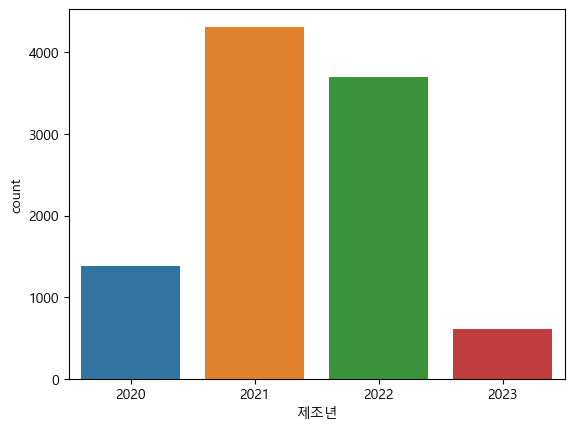

In [320]:
import seaborn as sns
sns.countplot(data = df_a , x = '제조년')

<function matplotlib.pyplot.show(close=None, block=None)>

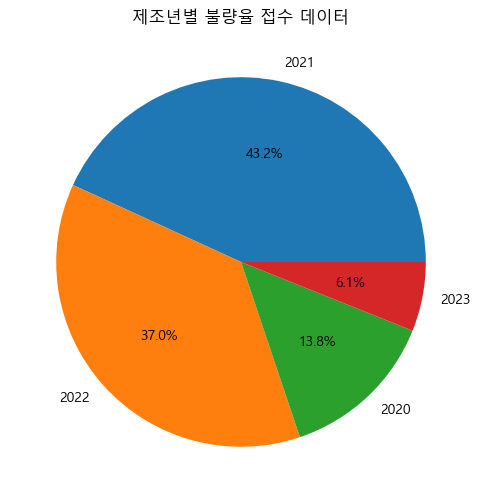

In [321]:
# 제조년도별 점유율 계산
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
제조년_counts = df_a['제조년'].value_counts()
labels = 제조년_counts.index.tolist()
sizes = 제조년_counts.values.tolist()
# 파이 그래프 그리기
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
# 그래프 제목 설정
plt.title('제조년별 불량율 접수 데이터')
plt.show



#### 접수년별 불량수량 보기

In [322]:
# 년도 추출하여 새로운 컬럼 추가 1
pd.to_datetime(df_a['접수일자']).dt.year

0       2021
1       2021
2       2021
3       2021
4       2021
        ... 
9995    2023
9996    2023
9997    2023
9998    2023
9999    2023
Name: 접수일자, Length: 10000, dtype: int64

In [323]:
# 년도 추출하여 새로운 컬럼 추가 2
df_a["접수년"] = pd.to_datetime(df_a['접수일자']).dt.year

In [324]:
df_a.head(3)

,접수번호,접수일자,제조일자,불량유형_대,불량유형_중,불량유형_소,불량원인,보증유무,처리_내역,수리_부품,부품_비용,수리비_청구,제조년,접수년
0,SL21560,2021-05-01,2021-04-16,기능,화면,동작안함,스위치고장,무상,부품교체,스위치 PCB Board Ass'y,25000,미청구,2021,2021
1,SL21561,2021-05-01,2020-03-06,기능,화면,켜지지 않음,Pcb Board 고장,유상,부품교체,MAIN Pcb Board,50000,50000,2020,2021
2,SL21562,2021-05-01,2021-04-13,외관,파손,케이스,검수미비,무상,제품교환,케이스,20000,미청구,2021,2021


In [325]:
# 체크박스로 표시할 년도 목록 생성
접수_years_list = df_a['접수년'].unique()
접수_years_list = sorted(접수_years_list, reverse=False)

In [326]:
df_a.loc[df_a['접수년'] == 2022]  # 2022 대신 "접수_years_list" 사용 (앱대시보드에 사용시)

,접수번호,접수일자,제조일자,불량유형_대,불량유형_중,불량유형_소,불량원인,보증유무,처리_내역,수리_부품,부품_비용,수리비_청구,제조년,접수년
3273,SL24833,2022-01-01,2021-03-09,기능,화면,두번 터치됨,Pcb Board 고장,무상,부품교체,MAIN Pcb Board,50000,미청구,2021,2022
3274,SL24834,2022-01-01,2021-01-23,기능,화면,두번 터치됨,Pcb Board 고장,무상,부품교체,MAIN Pcb Board,50000,미청구,2021,2022
3275,SL24835,2022-01-01,2021-10-01,기능,화면,두번 터치됨,Pcb Board 고장,무상,부품교체,MAIN Pcb Board,50000,미청구,2021,2022
3276,SL24836,2022-01-01,2021-03-07,외관,파손,액정,사용자 과실,유상,부품교체,액정 Ass'y,80000,80000,2021,2022
3277,SL24837,2022-01-01,2020-10-03,기능,화면,안켜짐,컨넥터 이탈,유상,부품교체,컨넥터 Ass'y,18000,18000,2020,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8042,SL29602,2022-12-31,2022-12-19,기능,화면,동작안함,스위치고장,무상,제품교환,스위치 PCB Board Ass'y,25000,미청구,2022,2022
8043,SL29603,2022-12-31,2021-10-15,기능,화면,켜지지 않음,배터리 방전,유상,부품교체,Battery,30000,30000,2021,2022
8044,SL29604,2022-12-31,2022-03-10,기능,화면,두번 터치됨,스위치고장,무상,부품교체,스위치 PCB Board Ass'y,25000,미청구,2022,2022
8045,SL29605,2022-12-31,2022-01-13,기능,화면,안켜짐,Pcb Board 고장,무상,부품교체,MAIN Pcb Board,50000,미청구,2022,2022


In [327]:
# 접수년별 a/s접수 수량 보기
df_a['접수년'].value_counts().sort_index()


2021    3273
2022    4774
2023    1953
Name: 접수년, dtype: int64

<Axes: xlabel='접수년', ylabel='count'>

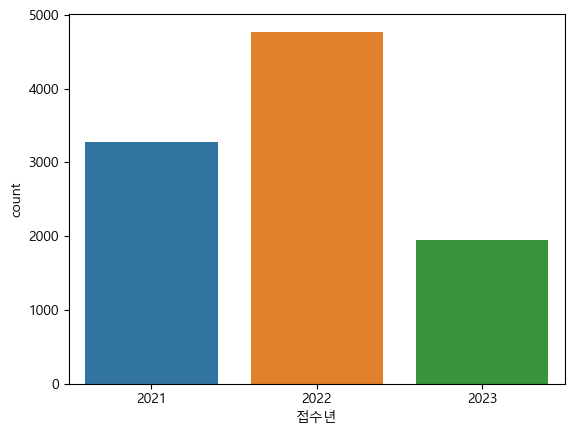

In [328]:
sns.countplot(data = df_a , x = '접수년')


<function matplotlib.pyplot.show(close=None, block=None)>

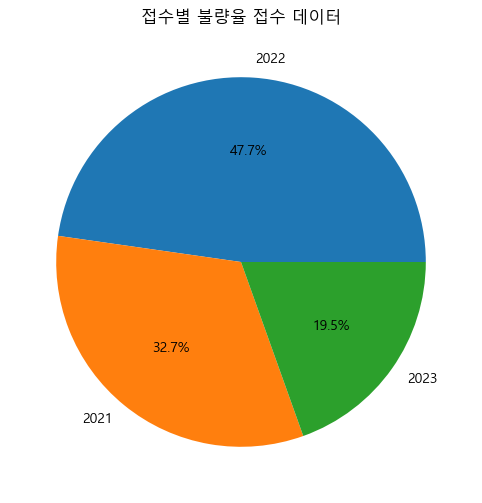

In [329]:
# 접수년도별 점유율 계산
접수년_counts = df_a['접수년'].value_counts()
plt.figure(figsize=(10,6))
labels = 접수년_counts.index.tolist()
sizes = 접수년_counts.values.tolist()
# 파이 그래프 그리기
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
# 그래프 제목 설정
plt.title('접수별 불량율 접수 데이터')
plt.show

#### 불량유형_대 별 불량수량 보기

In [330]:
df_a.head(3)

,접수번호,접수일자,제조일자,불량유형_대,불량유형_중,불량유형_소,불량원인,보증유무,처리_내역,수리_부품,부품_비용,수리비_청구,제조년,접수년
0,SL21560,2021-05-01,2021-04-16,기능,화면,동작안함,스위치고장,무상,부품교체,스위치 PCB Board Ass'y,25000,미청구,2021,2021
1,SL21561,2021-05-01,2020-03-06,기능,화면,켜지지 않음,Pcb Board 고장,유상,부품교체,MAIN Pcb Board,50000,50000,2020,2021
2,SL21562,2021-05-01,2021-04-13,외관,파손,케이스,검수미비,무상,제품교환,케이스,20000,미청구,2021,2021


In [331]:
df_a['불량유형_대'].nunique()

2

In [332]:
df_a['불량유형_대'].value_counts()

외관    5067
기능    4933
Name: 불량유형_대, dtype: int64

In [333]:
df_a['불량유형_대'] == "기능"

0        True
1        True
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997     True
9998     True
9999     True
Name: 불량유형_대, Length: 10000, dtype: bool

In [334]:
df_a['불량유형_대'].unique()

array(['기능', '외관'], dtype=object)

In [335]:
df_a.loc[df_a['불량유형_대'] == "기능"]

,접수번호,접수일자,제조일자,불량유형_대,불량유형_중,불량유형_소,불량원인,보증유무,처리_내역,수리_부품,부품_비용,수리비_청구,제조년,접수년
0,SL21560,2021-05-01,2021-04-16,기능,화면,동작안함,스위치고장,무상,부품교체,스위치 PCB Board Ass'y,25000,미청구,2021,2021
1,SL21561,2021-05-01,2020-03-06,기능,화면,켜지지 않음,Pcb Board 고장,유상,부품교체,MAIN Pcb Board,50000,50000,2020,2021
5,SL21565,2021-05-01,2020-04-20,기능,화면,동작안함,Pcb Board 고장,유상,부품교체,MAIN Pcb Board,50000,50000,2020,2021
7,SL21567,2021-05-01,2020-12-29,기능,화면,켜지지 않음,휴즈 끊어짐,무상,제품교환,Fuse,3000,미청구,2020,2021
8,SL21568,2021-05-02,2020-02-23,기능,화면,백화현상,Pcb Board 고장,유상,부품교체,MAIN Pcb Board,50000,50000,2020,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9992,SL31552,2023-05-31,2022-12-20,기능,화면,켜지지 않음,휴즈 끊어짐,무상,부품교체,Fuse,3000,미청구,2022,2023
9993,SL31553,2023-05-31,2022-03-11,기능,화면,켜지지 않음,전원스위치 고장,유상,부품교체,SMPS Pcb Board,45000,45000,2022,2023
9997,SL31557,2023-05-31,2022-12-29,기능,화면,동작안함,Pcb Board 고장,무상,부품교체,MAIN Pcb Board,50000,미청구,2022,2023
9998,SL31558,2023-05-31,2023-04-18,기능,화면,켜지지 않음,Pcb Board 고장,무상,부품교체,MAIN Pcb Board,50000,미청구,2023,2023


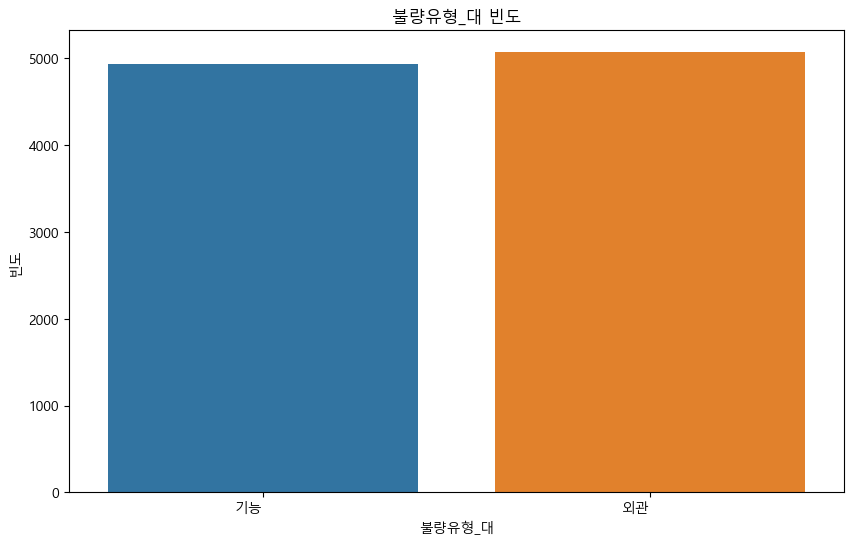

In [336]:
# 빈도 시각화
plt.figure(figsize=(10, 6))
대 = sns.countplot(data=df_a,x='불량유형_대')

# x축 레이블 45도 회전
대.set_xticklabels(대.get_xticklabels(), rotation=0, ha='right')

# x축, y축 레이블 설정
plt.xlabel("불량유형_대")
plt.ylabel("빈도")

# 그래프 제목 설정
plt.title("불량유형_대 빈도")

# 그래프 보여주기
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

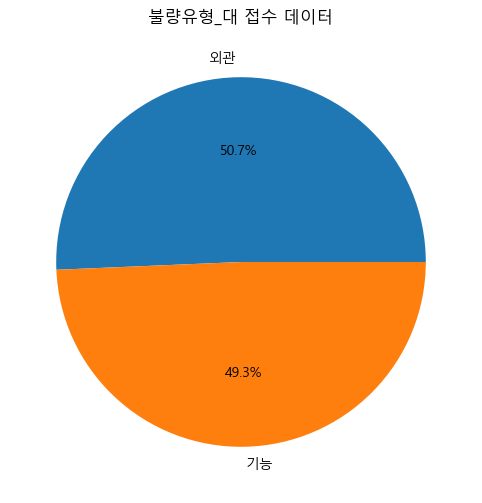

In [337]:
# 접수년도별 점유율 계산
plt.figure(figsize=(10,6))
불량유형_대_counts = df_a['불량유형_대'].value_counts()
labels = 불량유형_대_counts.index.tolist()
sizes = 불량유형_대_counts.values.tolist()
# 파이 그래프 그리기
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
# 그래프 제목 설정
plt.title('불량유형_대 접수 데이터')
plt.show

#### 불량유형_중 별 불량수량 보기

In [338]:
df_a['불량유형_중'].nunique()

4

In [339]:
df_a['불량유형_중'].value_counts()

화면    4933
오염    1714
파손    1685
흠집    1668
Name: 불량유형_중, dtype: int64

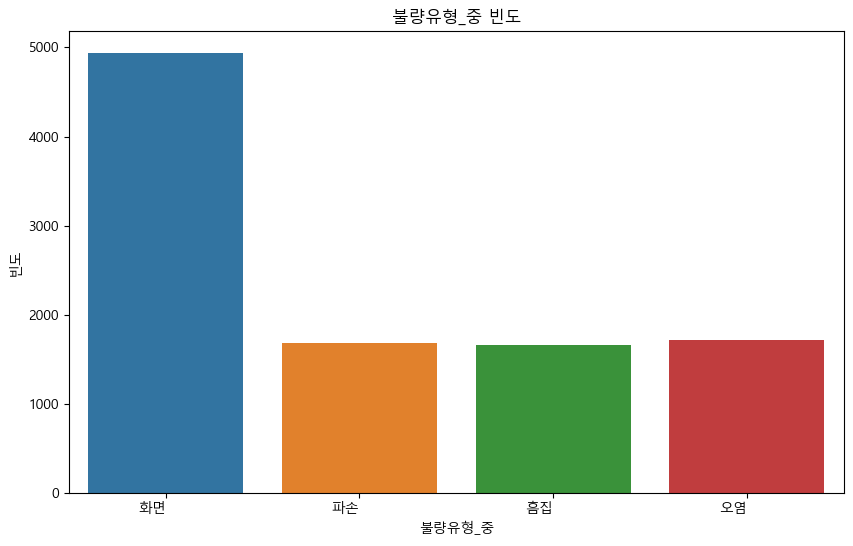

In [340]:
# 빈도 시각화
plt.figure(figsize=(10, 6))
중 = sns.countplot(data=df_a,x='불량유형_중')

# x축 레이블 45도 회전
중.set_xticklabels(중.get_xticklabels(), rotation=0, ha='right')

# x축, y축 레이블 설정
plt.xlabel("불량유형_중")
plt.ylabel("빈도")

# 그래프 제목 설정
plt.title("불량유형_중 빈도")

# 그래프 보여주기
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

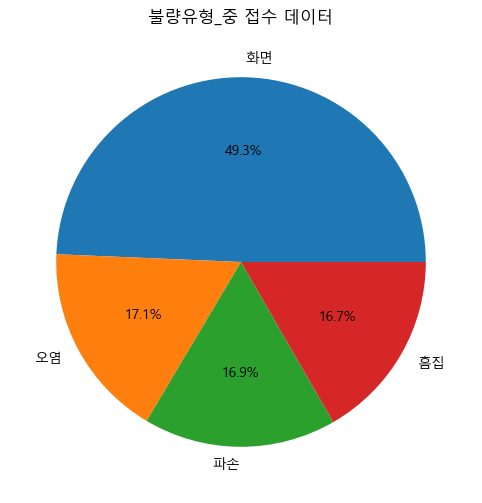

In [341]:
# 접수년도별 점유율 계산
불량유형_중_counts = df_a['불량유형_중'].value_counts()
plt.figure(figsize=(10, 6))
labels = 불량유형_중_counts.index.tolist()
sizes = 불량유형_중_counts.values.tolist()
# 파이 그래프 그리기
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
# 그래프 제목 설정
plt.title('불량유형_중 접수 데이터')
plt.show

#### 불량유형_소 별 불량수량 보기

In [342]:
df_a.head(3)

,접수번호,접수일자,제조일자,불량유형_대,불량유형_중,불량유형_소,불량원인,보증유무,처리_내역,수리_부품,부품_비용,수리비_청구,제조년,접수년
0,SL21560,2021-05-01,2021-04-16,기능,화면,동작안함,스위치고장,무상,부품교체,스위치 PCB Board Ass'y,25000,미청구,2021,2021
1,SL21561,2021-05-01,2020-03-06,기능,화면,켜지지 않음,Pcb Board 고장,유상,부품교체,MAIN Pcb Board,50000,50000,2020,2021
2,SL21562,2021-05-01,2021-04-13,외관,파손,케이스,검수미비,무상,제품교환,케이스,20000,미청구,2021,2021


In [343]:
df_a['불량유형_소'].nunique()

7

In [344]:
df_a['불량유형_소'].value_counts()

케이스       2610
액정        2457
켜지지 않음    1615
백화현상       843
안켜짐        842
동작안함       817
두번 터치됨     816
Name: 불량유형_소, dtype: int64

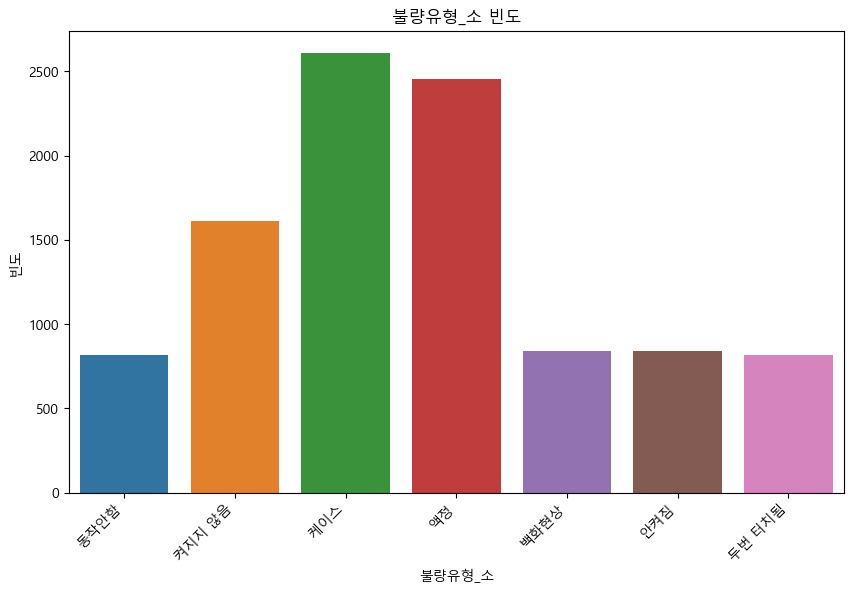

In [345]:
# 빈도 시각화
plt.figure(figsize=(10, 6))
소 = sns.countplot(data=df_a,x='불량유형_소')

# x축 레이블 45도 회전
소.set_xticklabels(소.get_xticklabels(), rotation=45, ha='right')

# x축, y축 레이블 설정
plt.xlabel("불량유형_소")
plt.ylabel("빈도")

# 그래프 제목 설정
plt.title("불량유형_소 빈도")

# 그래프 보여주기
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

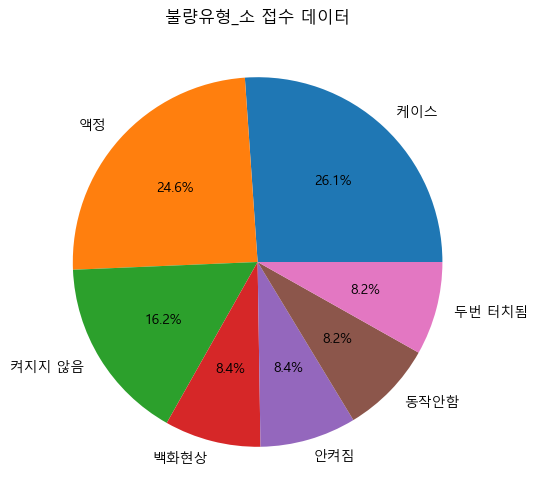

In [346]:
# 접수년도별 점유율 계산
불량유형_소_counts = df_a['불량유형_소'].value_counts()
plt.figure(figsize=(10, 6))
labels = 불량유형_소_counts.index.tolist()
sizes = 불량유형_소_counts.values.tolist()
# 파이 그래프 그리기
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
# 그래프 제목 설정
plt.title('불량유형_소 접수 데이터')
plt.show

#### 불량유형_소 별 불량수량 보기

In [347]:
df_a.head(3)

,접수번호,접수일자,제조일자,불량유형_대,불량유형_중,불량유형_소,불량원인,보증유무,처리_내역,수리_부품,부품_비용,수리비_청구,제조년,접수년
0,SL21560,2021-05-01,2021-04-16,기능,화면,동작안함,스위치고장,무상,부품교체,스위치 PCB Board Ass'y,25000,미청구,2021,2021
1,SL21561,2021-05-01,2020-03-06,기능,화면,켜지지 않음,Pcb Board 고장,유상,부품교체,MAIN Pcb Board,50000,50000,2020,2021
2,SL21562,2021-05-01,2021-04-13,외관,파손,케이스,검수미비,무상,제품교환,케이스,20000,미청구,2021,2021


In [348]:
df_a['불량원인'].nunique()

10

In [349]:
df_a['불량원인'].value_counts()

사용자 과실          2610
검수미비            2457
Pcb Board 고장    1740
스위치고장            808
액정 고장            535
휴즈 끊어짐           427
배터리 방전           413
전원스위치 고장         412
컨넥터 이탈           301
컨넥터 접촉불량         297
Name: 불량원인, dtype: int64

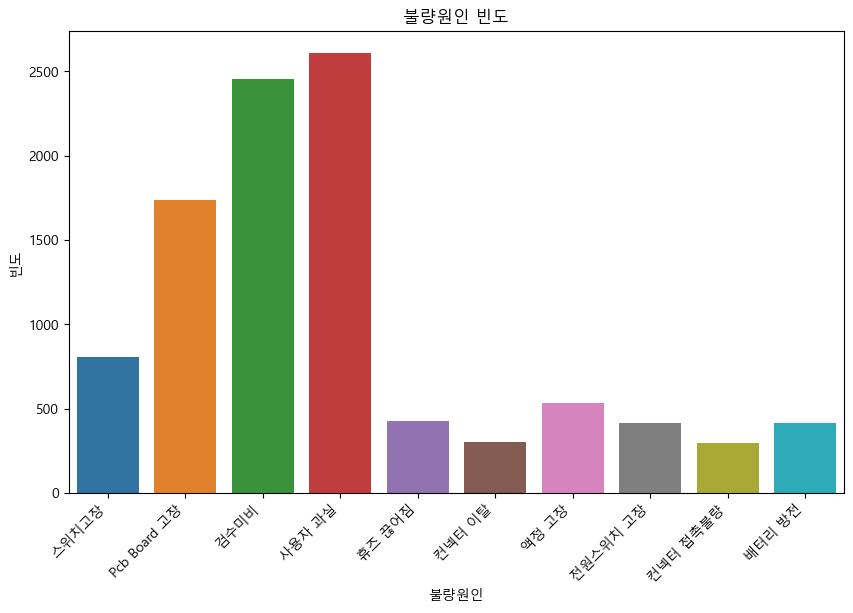

In [350]:
# 빈도 시각화
plt.figure(figsize=(10, 6))
원인 = sns.countplot(data=df_a, x="불량원인")

# x축 레이블 45도 회전
원인.set_xticklabels(원인.get_xticklabels(), rotation=45, ha='right')

# x축, y축 레이블 설정
plt.xlabel("불량원인")
plt.ylabel("빈도")

# 그래프 제목 설정
plt.title("불량원인 빈도")

# 그래프 보여주기
plt.show()


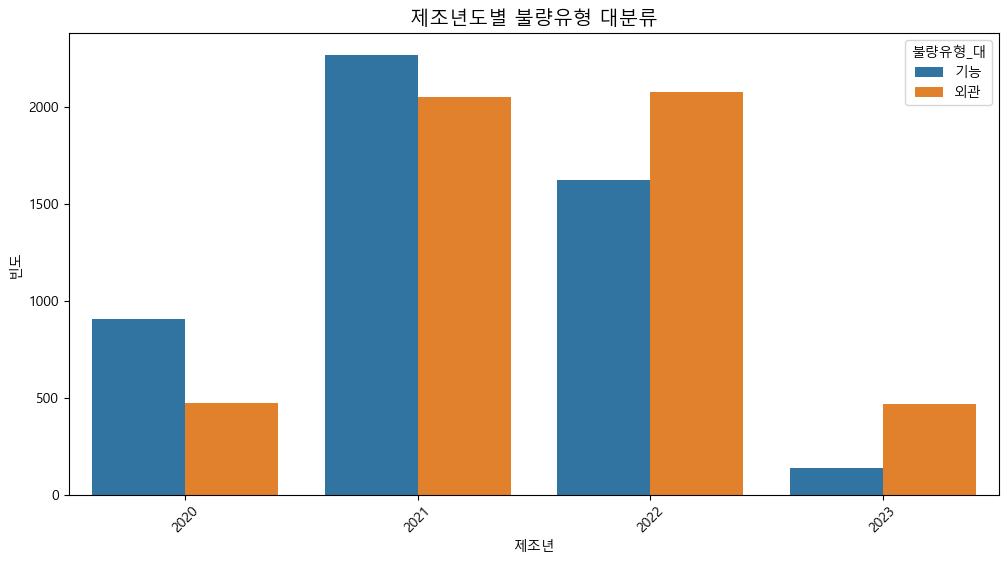

In [351]:
#제조년도별 불량유형 대분류
df_grouped = df_a.groupby(['제조년', '불량유형_대']).size().reset_index(name='빈도')

# 그래프 그리기
plt.figure(figsize=(12, 6))
sns.barplot(data=df_grouped, x='제조년', y='빈도', hue='불량유형_대')

# 그래프 제목 설정
plt.title('제조년도별 불량유형 대분류', fontsize=14)

# x축 라벨 회전하기
plt.xticks(rotation=45)

# 그래프 보여주기
plt.show()

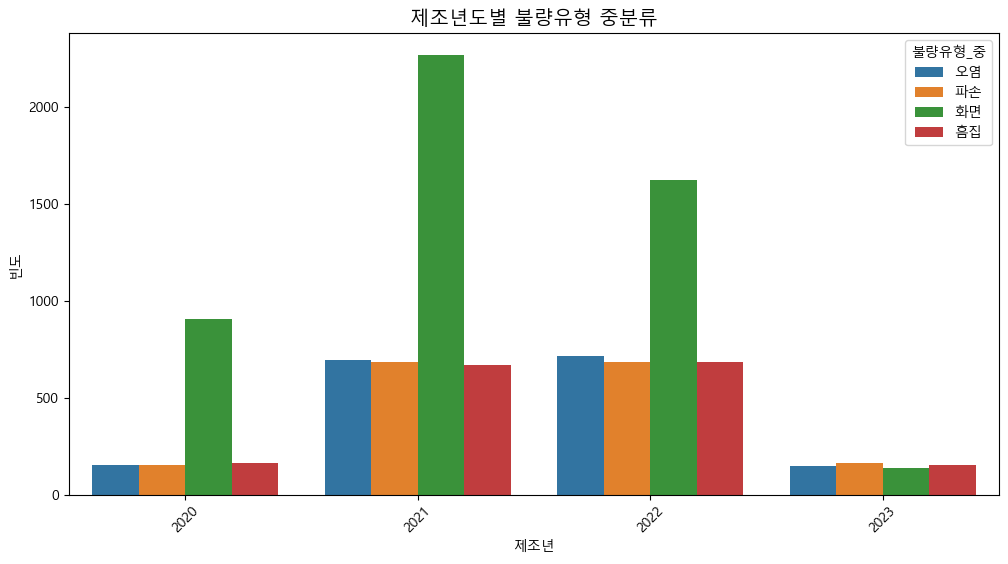

In [352]:
#제조년도별 불량유형 소분류
df_grouped = df_a.groupby(['제조년', '불량유형_중']).size().reset_index(name='빈도')

# 그래프 그리기
plt.figure(figsize=(12, 6))
sns.barplot(data=df_grouped, x='제조년', y='빈도', hue='불량유형_중')

# 그래프 제목 설정
plt.title('제조년도별 불량유형 중분류', fontsize=14)

# x축 라벨 회전하기
plt.xticks(rotation=45)

# 그래프 보여주기
plt.show()


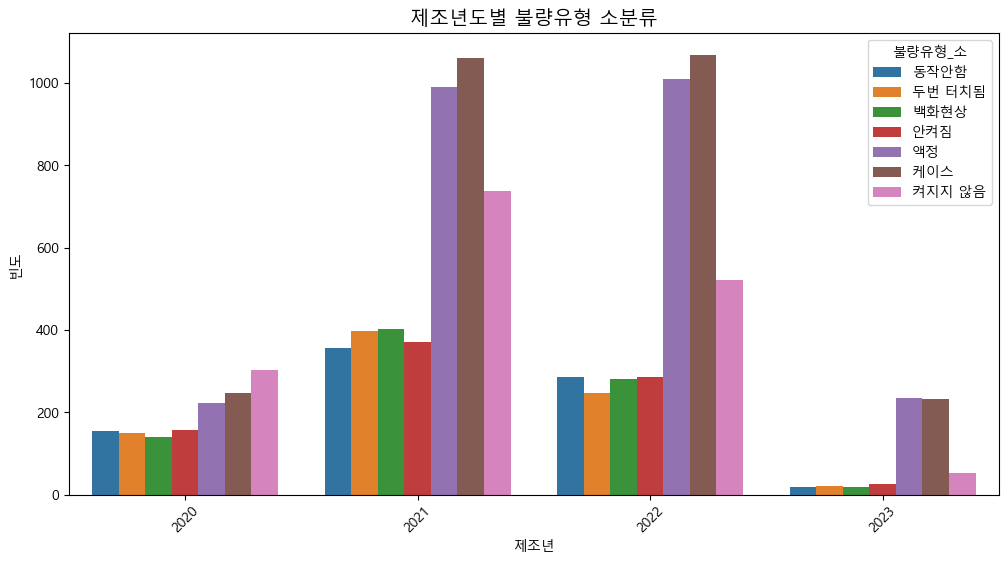

In [353]:
#제조년도별 불량유형 소분류
df_grouped = df_a.groupby(['제조년', '불량유형_소']).size().reset_index(name='빈도')

# 그래프 그리기
plt.figure(figsize=(12, 6))
sns.barplot(data=df_grouped, x='제조년', y='빈도', hue='불량유형_소')

# 그래프 제목 설정
plt.title('제조년도별 불량유형 소분류', fontsize=14)

# x축 라벨 회전하기
plt.xticks(rotation=45)

# 그래프 보여주기
plt.show()


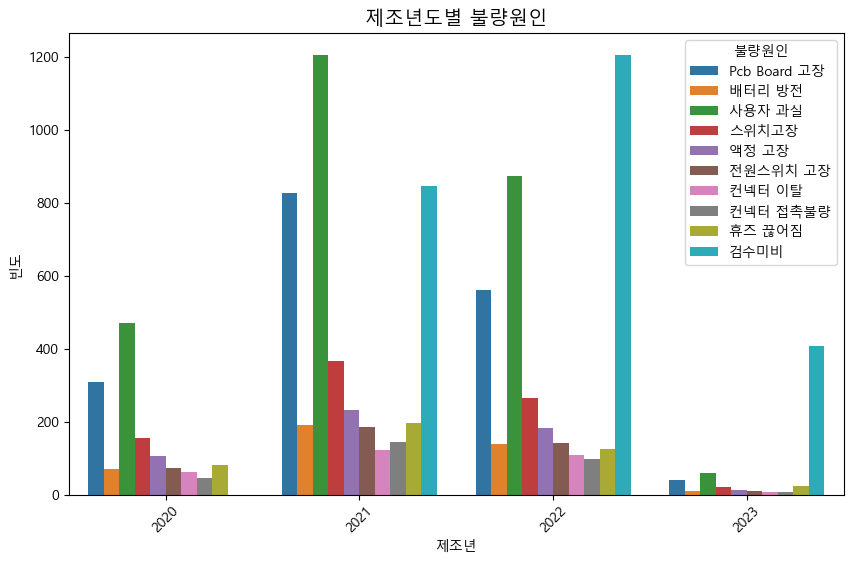

In [354]:
#제조년도별 불량원인
df_grouped = df_a.groupby(['제조년', '불량원인']).size().reset_index(name='빈도')

# 그래프 그리기
plt.figure(figsize=(10,6))
sns.barplot(data=df_grouped, x='제조년', y='빈도', hue='불량원인')

# 그래프 제목 설정
plt.title('제조년도별 불량원인', fontsize=14)

# x축 라벨 회전하기
plt.xticks(rotation=45)

# 그래프 보여주기
plt.show()

In [355]:
df_a.head(3)

,접수번호,접수일자,제조일자,불량유형_대,불량유형_중,불량유형_소,불량원인,보증유무,처리_내역,수리_부품,부품_비용,수리비_청구,제조년,접수년
0,SL21560,2021-05-01,2021-04-16,기능,화면,동작안함,스위치고장,무상,부품교체,스위치 PCB Board Ass'y,25000,미청구,2021,2021
1,SL21561,2021-05-01,2020-03-06,기능,화면,켜지지 않음,Pcb Board 고장,유상,부품교체,MAIN Pcb Board,50000,50000,2020,2021
2,SL21562,2021-05-01,2021-04-13,외관,파손,케이스,검수미비,무상,제품교환,케이스,20000,미청구,2021,2021


In [356]:
df_a['제조년'] == 2021

0        True
1       False
2        True
3       False
4        True
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Name: 제조년, Length: 10000, dtype: bool

In [357]:
df_제조년 = df_a.loc[df_a['제조년'] == 2021]

In [358]:
df_제조년

,접수번호,접수일자,제조일자,불량유형_대,불량유형_중,불량유형_소,불량원인,보증유무,처리_내역,수리_부품,부품_비용,수리비_청구,제조년,접수년
0,SL21560,2021-05-01,2021-04-16,기능,화면,동작안함,스위치고장,무상,부품교체,스위치 PCB Board Ass'y,25000,미청구,2021,2021
2,SL21562,2021-05-01,2021-04-13,외관,파손,케이스,검수미비,무상,제품교환,케이스,20000,미청구,2021,2021
4,SL21564,2021-05-01,2021-04-28,외관,흠집,케이스,검수미비,무상,제품교환,케이스,20000,미청구,2021,2021
16,SL21576,2021-05-02,2021-04-29,외관,파손,케이스,검수미비,무상,제품교환,케이스,20000,미청구,2021,2021
17,SL21577,2021-05-02,2021-01-14,기능,화면,켜지지 않음,전원스위치 고장,무상,부품교체,SMPS Pcb Board,45000,미청구,2021,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9307,SL30867,2023-04-06,2021-12-17,외관,오염,케이스,사용자 과실,유상,부품교체,케이스,20000,20000,2021,2023
9370,SL30930,2023-04-11,2021-12-18,기능,화면,두번 터치됨,Pcb Board 고장,유상,부품교체,MAIN Pcb Board,50000,50000,2021,2023
9385,SL30945,2023-04-12,2021-12-31,기능,화면,동작안함,Pcb Board 고장,유상,부품교체,MAIN Pcb Board,50000,50000,2021,2023
9421,SL30981,2023-04-15,2021-12-22,외관,흠집,케이스,사용자 과실,유상,부품교체,케이스,20000,20000,2021,2023


In [359]:
df_검수미비 = df_제조년.loc[df_제조년['불량원인'] == '검수미비']

In [360]:
df_검수미비

,접수번호,접수일자,제조일자,불량유형_대,불량유형_중,불량유형_소,불량원인,보증유무,처리_내역,수리_부품,부품_비용,수리비_청구,제조년,접수년
2,SL21562,2021-05-01,2021-04-13,외관,파손,케이스,검수미비,무상,제품교환,케이스,20000,미청구,2021,2021
4,SL21564,2021-05-01,2021-04-28,외관,흠집,케이스,검수미비,무상,제품교환,케이스,20000,미청구,2021,2021
16,SL21576,2021-05-02,2021-04-29,외관,파손,케이스,검수미비,무상,제품교환,케이스,20000,미청구,2021,2021
18,SL21578,2021-05-02,2021-04-06,외관,오염,액정,검수미비,무상,제품교환,액정 Ass'y,80000,미청구,2021,2021
24,SL21584,2021-05-02,2021-04-30,외관,파손,케이스,검수미비,무상,제품교환,케이스,20000,미청구,2021,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3507,SL25067,2022-01-19,2021-12-29,외관,오염,액정,검수미비,무상,제품교환,액정 Ass'y,80000,미청구,2021,2022
3520,SL25080,2022-01-20,2021-12-26,외관,파손,케이스,검수미비,무상,제품교환,케이스,20000,미청구,2021,2022
3565,SL25125,2022-01-23,2021-12-26,외관,파손,케이스,검수미비,무상,제품교환,케이스,20000,미청구,2021,2022
3616,SL25176,2022-01-26,2021-12-29,외관,흠집,액정,검수미비,무상,제품교환,액정 Ass'y,80000,미청구,2021,2022


In [361]:
df_a.to_csv('df_year')

In [362]:
df_year = pd.read_csv('df_year',index_col=0)

In [363]:
df_year

,접수번호,접수일자,제조일자,불량유형_대,불량유형_중,불량유형_소,불량원인,보증유무,처리_내역,수리_부품,부품_비용,수리비_청구,제조년,접수년
0,SL21560,2021-05-01,2021-04-16,기능,화면,동작안함,스위치고장,무상,부품교체,스위치 PCB Board Ass'y,25000,미청구,2021,2021
1,SL21561,2021-05-01,2020-03-06,기능,화면,켜지지 않음,Pcb Board 고장,유상,부품교체,MAIN Pcb Board,50000,50000,2020,2021
2,SL21562,2021-05-01,2021-04-13,외관,파손,케이스,검수미비,무상,제품교환,케이스,20000,미청구,2021,2021
3,SL21563,2021-05-01,2020-05-20,외관,흠집,액정,사용자 과실,유상,부품교체,액정 Ass'y,80000,80000,2020,2021
4,SL21564,2021-05-01,2021-04-28,외관,흠집,케이스,검수미비,무상,제품교환,케이스,20000,미청구,2021,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,SL31555,2023-05-31,2022-02-13,외관,파손,액정,사용자 과실,유상,부품교체,액정 Ass'y,80000,80000,2022,2023
9996,SL31556,2023-05-31,2023-05-11,외관,흠집,액정,검수미비,무상,제품교환,액정 Ass'y,80000,미청구,2023,2023
9997,SL31557,2023-05-31,2022-12-29,기능,화면,동작안함,Pcb Board 고장,무상,부품교체,MAIN Pcb Board,50000,미청구,2022,2023
9998,SL31558,2023-05-31,2023-04-18,기능,화면,켜지지 않음,Pcb Board 고장,무상,부품교체,MAIN Pcb Board,50000,미청구,2023,2023


In [364]:
df_b = pd.read_csv('AS_Management_Data_B.csv')

In [365]:
df_b

,접수번호,수리부품,부품공급업체,Q.C담당
0,SL21560,스위치 PCB Board Ass'y,A테크,링링
1,SL21561,MAIN Pcb Board,B텍,링링
2,SL21562,케이스,B사출,김민지
3,SL21563,액정 Ass'y,B패널,김민지
4,SL21564,케이스,B사출,김민지
...,...,...,...,...
9995,SL31555,액정 Ass'y,B패널,링링
9996,SL31556,액정 Ass'y,B패널,김민지
9997,SL31557,MAIN Pcb Board,A테크,링링
9998,SL31558,MAIN Pcb Board,B텍,링링


In [366]:
df_total = pd.merge(df_year, df_b, on = '접수번호', how='left')

In [367]:
df_total

,접수번호,접수일자,제조일자,불량유형_대,불량유형_중,불량유형_소,불량원인,보증유무,처리_내역,수리_부품,부품_비용,수리비_청구,제조년,접수년,수리부품,부품공급업체,Q.C담당
0,SL21560,2021-05-01,2021-04-16,기능,화면,동작안함,스위치고장,무상,부품교체,스위치 PCB Board Ass'y,25000,미청구,2021,2021,스위치 PCB Board Ass'y,A테크,링링
1,SL21561,2021-05-01,2020-03-06,기능,화면,켜지지 않음,Pcb Board 고장,유상,부품교체,MAIN Pcb Board,50000,50000,2020,2021,MAIN Pcb Board,B텍,링링
2,SL21562,2021-05-01,2021-04-13,외관,파손,케이스,검수미비,무상,제품교환,케이스,20000,미청구,2021,2021,케이스,B사출,김민지
3,SL21563,2021-05-01,2020-05-20,외관,흠집,액정,사용자 과실,유상,부품교체,액정 Ass'y,80000,80000,2020,2021,액정 Ass'y,B패널,김민지
4,SL21564,2021-05-01,2021-04-28,외관,흠집,케이스,검수미비,무상,제품교환,케이스,20000,미청구,2021,2021,케이스,B사출,김민지
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,SL31555,2023-05-31,2022-02-13,외관,파손,액정,사용자 과실,유상,부품교체,액정 Ass'y,80000,80000,2022,2023,액정 Ass'y,B패널,링링
9996,SL31556,2023-05-31,2023-05-11,외관,흠집,액정,검수미비,무상,제품교환,액정 Ass'y,80000,미청구,2023,2023,액정 Ass'y,B패널,김민지
9997,SL31557,2023-05-31,2022-12-29,기능,화면,동작안함,Pcb Board 고장,무상,부품교체,MAIN Pcb Board,50000,미청구,2022,2023,MAIN Pcb Board,A테크,링링
9998,SL31558,2023-05-31,2023-04-18,기능,화면,켜지지 않음,Pcb Board 고장,무상,부품교체,MAIN Pcb Board,50000,미청구,2023,2023,MAIN Pcb Board,B텍,링링


In [368]:
df_total.to_csv('df_total', index=False)


In [369]:
df_total = pd.read_csv('df_total')

In [370]:
df_total

,접수번호,접수일자,제조일자,불량유형_대,불량유형_중,불량유형_소,불량원인,보증유무,처리_내역,수리_부품,부품_비용,수리비_청구,제조년,접수년,수리부품,부품공급업체,Q.C담당
0,SL21560,2021-05-01,2021-04-16,기능,화면,동작안함,스위치고장,무상,부품교체,스위치 PCB Board Ass'y,25000,미청구,2021,2021,스위치 PCB Board Ass'y,A테크,링링
1,SL21561,2021-05-01,2020-03-06,기능,화면,켜지지 않음,Pcb Board 고장,유상,부품교체,MAIN Pcb Board,50000,50000,2020,2021,MAIN Pcb Board,B텍,링링
2,SL21562,2021-05-01,2021-04-13,외관,파손,케이스,검수미비,무상,제품교환,케이스,20000,미청구,2021,2021,케이스,B사출,김민지
3,SL21563,2021-05-01,2020-05-20,외관,흠집,액정,사용자 과실,유상,부품교체,액정 Ass'y,80000,80000,2020,2021,액정 Ass'y,B패널,김민지
4,SL21564,2021-05-01,2021-04-28,외관,흠집,케이스,검수미비,무상,제품교환,케이스,20000,미청구,2021,2021,케이스,B사출,김민지
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,SL31555,2023-05-31,2022-02-13,외관,파손,액정,사용자 과실,유상,부품교체,액정 Ass'y,80000,80000,2022,2023,액정 Ass'y,B패널,링링
9996,SL31556,2023-05-31,2023-05-11,외관,흠집,액정,검수미비,무상,제품교환,액정 Ass'y,80000,미청구,2023,2023,액정 Ass'y,B패널,김민지
9997,SL31557,2023-05-31,2022-12-29,기능,화면,동작안함,Pcb Board 고장,무상,부품교체,MAIN Pcb Board,50000,미청구,2022,2023,MAIN Pcb Board,A테크,링링
9998,SL31558,2023-05-31,2023-04-18,기능,화면,켜지지 않음,Pcb Board 고장,무상,부품교체,MAIN Pcb Board,50000,미청구,2023,2023,MAIN Pcb Board,B텍,링링


In [371]:
df_total['수리부품'].unique()

array(["스위치 PCB Board Ass'y", 'MAIN Pcb Board', '케이스', "액정 Ass'y", 'Fuse',
       "컨넥터 Ass'y", 'SMPS Pcb Board', 'Battery'], dtype=object)

In [372]:
df_total['부품공급업체'].unique()

array([' A테크 ', ' B텍 ', ' B사출 ', ' B패널 ', ' C코닝 ', ' A상사 ', ' C테크놀러지 ',
       ' A케이블 ', ' B파츠 ', ' A액정 ', ' A케이스 ', ' C커버 ', ' B통신 ', ' B전지 ',
       ' A리튬 ', ' C파워 ', ' C텍 '], dtype=object)

In [373]:
# df_total 데이터프레임의 수리부품과 부품공급업체 컬럼 가져오기
수리부품 = df_total['수리부품']
부품공급업체 = df_total['부품공급업체']

# 수리부품에 해당하는 부품공급업체들을 그룹화하여 출력
grouped = df_total.groupby(수리부품)['부품공급업체'].unique().reset_index()
grouped.columns = ['수리부품', '부품공급업체']

In [374]:
grouped

,수리부품,부품공급업체
0,Battery,"[ B전지 , A리튬 , C파워 ]"
1,Fuse,"[ A상사 , B파츠 ]"
2,MAIN Pcb Board,"[ B텍 , C테크놀러지 , A테크 ]"
3,SMPS Pcb Board,"[ B텍 , C테크놀러지 , A테크 ]"
4,스위치 PCB Board Ass'y,"[ A테크 , B텍 , C테크놀러지 ]"
5,액정 Ass'y,"[ B패널 , C코닝 , A액정 ]"
6,컨넥터 Ass'y,"[ A케이블 , B통신 , C텍 ]"
7,케이스,"[ B사출 , A케이스 , C커버 ]"


In [377]:
# df_year 데이터프레임의 수리부품과 부품공급업체 컬럼 가져오기
수리부품 = df_total['수리부품']
부품공급업체 = df_total['부품공급업체']

# 수리부품에 해당하는 부품공급업체들을 그룹화하여 출력
grouped = df_total.groupby(수리부품)['부품공급업체'].unique().reset_index()
grouped.columns = ['수리부품', '부품공급업체들']

# A에 해당하는 부품공급업체 그룹화
grouped_Battery = df_total[df_total['수리부품'] == 'Battery'].groupby('부품공급업체').size()

# 결과 출력

print(grouped)
print(grouped_Battery)

                  수리부품                  부품공급업체들
0              Battery    [ B전지 ,  A리튬 ,  C파워 ]
1                 Fuse           [ A상사 ,  B파츠 ]
2       MAIN Pcb Board  [ B텍 ,  C테크놀러지 ,  A테크 ]
3       SMPS Pcb Board  [ B텍 ,  C테크놀러지 ,  A테크 ]
4  스위치 PCB Board Ass'y  [ A테크 ,  B텍 ,  C테크놀러지 ]
5             액정 Ass'y    [ B패널 ,  C코닝 ,  A액정 ]
6            컨넥터 Ass'y    [ A케이블 ,  B통신 ,  C텍 ]
7                  케이스   [ B사출 ,  A케이스 ,  C커버 ]
부품공급업체
 A리튬      83
 B전지      81
 C파워     249
dtype: int64


In [378]:
df_total

,접수번호,접수일자,제조일자,불량유형_대,불량유형_중,불량유형_소,불량원인,보증유무,처리_내역,수리_부품,부품_비용,수리비_청구,제조년,접수년,수리부품,부품공급업체,Q.C담당
0,SL21560,2021-05-01,2021-04-16,기능,화면,동작안함,스위치고장,무상,부품교체,스위치 PCB Board Ass'y,25000,미청구,2021,2021,스위치 PCB Board Ass'y,A테크,링링
1,SL21561,2021-05-01,2020-03-06,기능,화면,켜지지 않음,Pcb Board 고장,유상,부품교체,MAIN Pcb Board,50000,50000,2020,2021,MAIN Pcb Board,B텍,링링
2,SL21562,2021-05-01,2021-04-13,외관,파손,케이스,검수미비,무상,제품교환,케이스,20000,미청구,2021,2021,케이스,B사출,김민지
3,SL21563,2021-05-01,2020-05-20,외관,흠집,액정,사용자 과실,유상,부품교체,액정 Ass'y,80000,80000,2020,2021,액정 Ass'y,B패널,김민지
4,SL21564,2021-05-01,2021-04-28,외관,흠집,케이스,검수미비,무상,제품교환,케이스,20000,미청구,2021,2021,케이스,B사출,김민지
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,SL31555,2023-05-31,2022-02-13,외관,파손,액정,사용자 과실,유상,부품교체,액정 Ass'y,80000,80000,2022,2023,액정 Ass'y,B패널,링링
9996,SL31556,2023-05-31,2023-05-11,외관,흠집,액정,검수미비,무상,제품교환,액정 Ass'y,80000,미청구,2023,2023,액정 Ass'y,B패널,김민지
9997,SL31557,2023-05-31,2022-12-29,기능,화면,동작안함,Pcb Board 고장,무상,부품교체,MAIN Pcb Board,50000,미청구,2022,2023,MAIN Pcb Board,A테크,링링
9998,SL31558,2023-05-31,2023-04-18,기능,화면,켜지지 않음,Pcb Board 고장,무상,부품교체,MAIN Pcb Board,50000,미청구,2023,2023,MAIN Pcb Board,B텍,링링
